# <center> Pipelines, Serialization </center> 

<p style="align: center;"><img align=center src="./images/Industrial-Pipeline-Cleaning.jpg"  width=1000></p>

.

.

<p style="align: center;"><img align=center src="https://hazelcast.com/wp-content/uploads/2019/11/24_DataPipleline-1.png"  width=1000></p>

In [2]:
import pandas as pd
import numpy as np

# Пара библиотек для визуализации
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

# Импорт Данных

In [125]:
file_path = 'https://raw.githubusercontent.com/a-milenkin/Datasetes_for_Piplines/main/responses.csv'
data = pd.read_csv(file_path)

In [126]:
data.shape

(1010, 150)

In [130]:

data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


<div class="alert alert-info">

<b>Про датасет </b>


    
Приведеные результаты опроса молодежи до 21-го года по тому, какие вещи делют их счастливыми по 5-й шкале
    
</div>


<div class="alert alert-info">

<b>Про Задачу </b>

Попробуем классифицировать людей по оценкам уровня счастья
    
</div>


In [131]:
interesting_features = ["Happiness in life", "Age", "Height", "Gender", "Weight", 
              "Left - right handed", "Village - town", "Getting up", "God",
              "Health", "Borrowed stuff", "Self-criticism", "Elections", 
              "Smoking", "Alcohol" ,"Number of friends", "Spending on healthy eating",
              "Music", "Movies", "Friends versus money", "Changing the past"]


target = ["Happiness in life"]

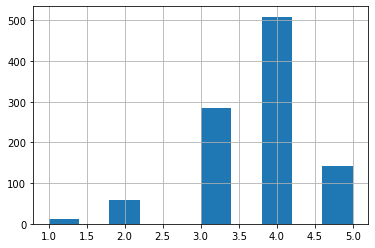

In [132]:
data["Happiness in life"].hist();

In [133]:
data = data[interesting_features]

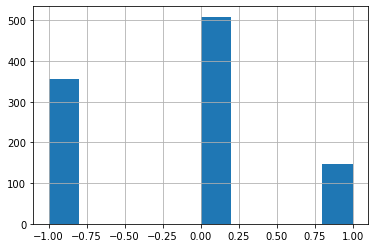

In [134]:
# Сбалансируем немного классы

def happiness_score(x):
    if x < 4:
        return -1
    elif x == 4.0:
        return 0
    else:
        return 1
    
data["Happiness in life"] = data["Happiness in life"].apply(happiness_score)

data["Happiness in life"].hist();

# Как пишут код обычно? - The painful way

<AxesSubplot:>

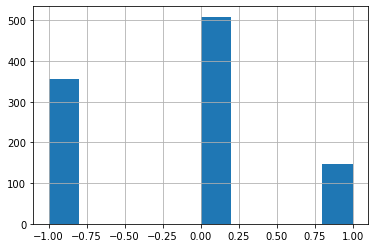

In [135]:
data["Happiness in life"].hist()

# Какой-нибудь EDA (исследование данных)

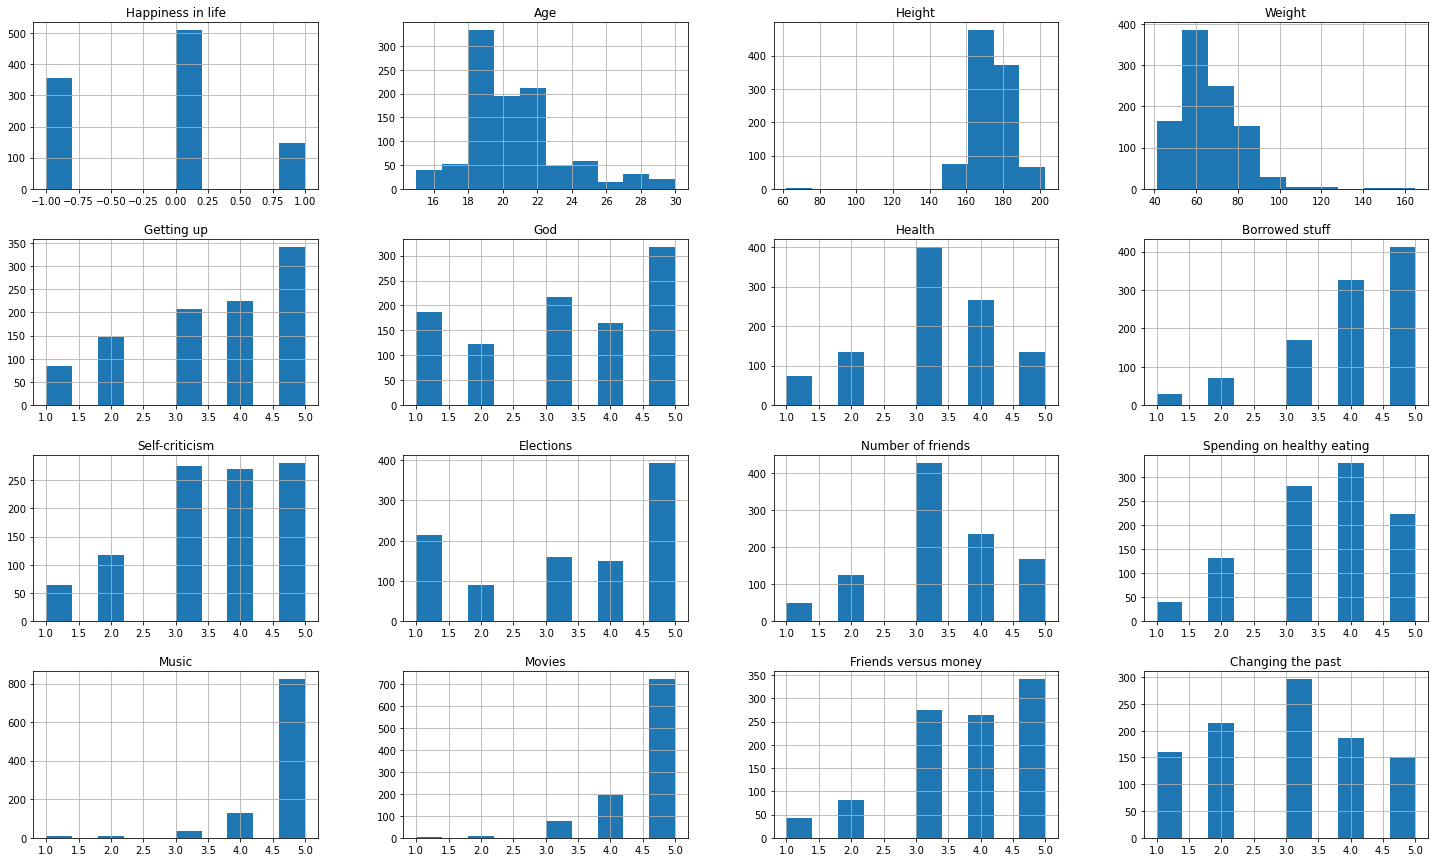

In [136]:
data.hist(figsize=(25, 15))

plt.show()

<AxesSubplot:>

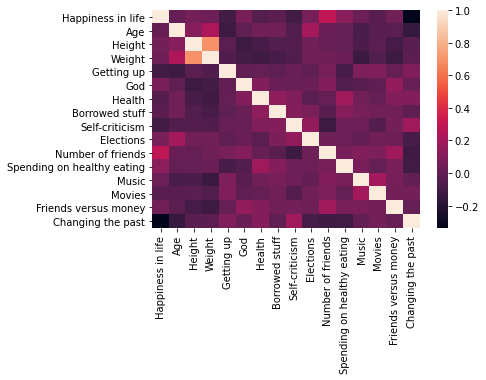

In [137]:
import seaborn as sns

sns.heatmap(data.corr())

# Есть ли в данных выбросы? Есть почти всегда!

In [138]:
# data.isnull().sum()

In [139]:
data.dropna(inplace=True)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[target])

print(data_train.shape, data_test.shape)

(740, 21) (185, 21)


In [141]:
data.head()

,Happiness in life,Age,Height,Gender,Weight,Left - right handed,Village - town,Getting up,God,Health,...,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
0,0,20.0,163.0,female,48.0,right handed,village,2.0,1.0,1.0,...,1.0,4.0,never smoked,drink a lot,3,3.0,5.0,5.0,3.0,1.0
1,0,19.0,163.0,female,58.0,right handed,city,5.0,1.0,4.0,...,4.0,5.0,never smoked,drink a lot,3,2.0,4.0,5.0,4.0,4.0
2,0,20.0,176.0,female,67.0,right handed,city,4.0,5.0,2.0,...,4.0,5.0,tried smoking,drink a lot,3,2.0,5.0,5.0,5.0,5.0
3,-1,22.0,172.0,female,59.0,right handed,city,1.0,4.0,1.0,...,5.0,5.0,former smoker,drink a lot,1,1.0,5.0,5.0,2.0,5.0
4,-1,20.0,170.0,female,59.0,right handed,village,4.0,5.0,3.0,...,5.0,5.0,tried smoking,social drinker,3,4.0,5.0,5.0,3.0,4.0


In [142]:
data['Alcohol'].value_counts()

social drinker    605
drink a lot       210
never             110
Name: Alcohol, dtype: int64

# Какие признаки в данных?

In [143]:
numerical_features = ['Age', 'Height', 'Weight', "Number of friends"]  # Численные переменные

# Бинарные признаки
to_dummies = [
    'Gender', 'Left - right handed', 'Village - town', 'Smoking',  "Alcohol" ,
]

# Категориальные признаки
categorical_features = [
    col for col in data.columns if col not in numerical_features + target + to_dummies
]

all_features = categorical_features + numerical_features
len(all_features)

15

In [144]:
# data[numerical_features]

In [145]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

In [146]:
scaler = StandardScaler() # Нормировка для численных признаков

In [147]:
data_train_scaled = scaler.fit_transform(data_train[numerical_features])
data_train_scaled[:10]

array([[ 0.18909251, -1.21890074, -0.84505772,  0.62575366],
       [-0.50706897,  0.43952142, -0.10369114, -1.27592071],
       [-1.20323044,  1.12240114,  0.26699215, -0.32508353],
       [ 0.18909251, -1.21890074, -0.10369114, -0.32508353],
       [ 0.18909251, -1.51156348, -1.28987766,  1.57659085],
       [ 0.53717325,  1.70772661,  1.37904202, -2.2267579 ],
       [ 1.58141546, -0.34091254, -1.06746769, -0.32508353],
       [ 3.32181914, -1.31645499, -1.43815098, -0.32508353],
       [ 0.88525398, -0.24335829, -0.54851108,  1.57659085],
       [-0.8551497 ,  1.41506387,  0.63767544,  0.62575366]])

In [148]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')  # кодирование для категориальных признаков

data_train_ohe = ohe.fit_transform(data_train[to_dummies])
data_train_ohe[:10]

array([[1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [149]:
data_train_tramsformed = pd.concat([pd.DataFrame(data_train_scaled, columns=numerical_features),
                                    pd.DataFrame(data_train_ohe, columns=ohe.get_feature_names()),
                                   # pd.DataFrame(data_train[categorical_features].values)
                                   ], axis=1)
data_train_tramsformed.head()

,Age,Height,Weight,Number of friends,x0_female,x0_male,x1_left handed,x1_right handed,x2_city,x2_village,x3_current smoker,x3_former smoker,x3_never smoked,x3_tried smoking,x4_drink a lot,x4_never,x4_social drinker
0,0.189093,-1.218901,-0.845058,0.625754,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.507069,0.439521,-0.103691,-1.275921,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.203230,1.122401,0.266992,-0.325084,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.189093,-1.218901,-0.103691,-0.325084,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.189093,-1.511563,-1.289878,1.576591,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# ML часть

In [25]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer

In [26]:
# data_train_tramsformed.columns

In [27]:
model = LogisticRegression()

model.fit(data_train_tramsformed, data_train[target])

LogisticRegression()

In [28]:
preds = model.predict(data_train_tramsformed)


print(classification_report(data_train[target], preds))

              precision    recall  f1-score   support

          -1       0.55      0.30      0.39       259
           0       0.54      0.86      0.66       374
           1       0.64      0.07      0.12       107

    accuracy                           0.55       740
   macro avg       0.58      0.41      0.39       740
weighted avg       0.56      0.55      0.49       740



# А как же тест?! Валидация

In [29]:
data_test_scaled = scaler.transform(data_test[numerical_features])
data_test_scaled[:10]

array([[-0.83459428,  0.86831768, -0.23718558, -0.33733799],
       [-0.11728909, -1.79012351, -1.57758096,  1.57553646],
       [ 0.2413635 , -1.10089802, -1.1307825 ,  0.61909923],
       [ 0.2413635 , -0.41167252, -0.83291686, -2.25021245],
       [-0.11728909, -0.31321174, -0.31165199,  1.57553646],
       [-0.47594169, -1.39628037, -1.05631609,  1.57553646],
       [-0.11728909, -0.60859409, -0.68398404, -0.33733799],
       [ 3.46923686, -0.01782939,  0.43301211,  1.57553646],
       [-0.83459428, -1.1993588 ,  0.58194493,  1.57553646],
       [-0.47594169, -0.31321174, -1.20524891,  0.61909923]])

In [30]:
data_test_ohe = ohe.transform(data_test[to_dummies])
data_test_ohe[:10]

array([[0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.]])

In [31]:
data_test_tramsformed = pd.concat(
    [
        pd.DataFrame(data_test_scaled, columns=numerical_features),
        pd.DataFrame(data_test_ohe, columns=ohe.get_feature_names()),
        # pd.DataFrame(data_test[categorical_features].values)
    ],
    axis=1,
)
data_test_tramsformed.head()

,Age,Height,Weight,Number of friends,x0_female,x0_male,x1_left handed,x1_right handed,x2_city,x2_village,x3_current smoker,x3_former smoker,x3_never smoked,x3_tried smoking,x4_drink a lot,x4_never,x4_social drinker
0,-0.834594,0.868318,-0.237186,-0.337338,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.117289,-1.790124,-1.577581,1.575536,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.241364,-1.100898,-1.130782,0.619099,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.241364,-0.411673,-0.832917,-2.250212,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.117289,-0.313212,-0.311652,1.575536,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
preds = model.predict(data_test_tramsformed)

In [33]:
print(classification_report(data_test[target], preds))

              precision    recall  f1-score   support

          -1       0.50      0.31      0.38        65
           0       0.53      0.81      0.64        93
           1       0.33      0.04      0.07        27

    accuracy                           0.52       185
   macro avg       0.45      0.38      0.36       185
weighted avg       0.49      0.52      0.46       185



## Что не так с этим способом?

<div class="alert alert-warning">


 - Дублируем код ли кода

 - Сложно маcштабировать

 - Сложно поддерживать свой код
    
 - Много времени тратится на написание(

Как сохранить всю эту махину? 

# Как пишут код true-датасаентисты - The pipeline way 

<div>
<img src="https://i.pinimg.com/564x/41/d2/4b/41d24b25710d7746b22a7eb34316952c.jpg" width="500"/>
</div>

<div class="alert alert-info">

Pipeline позволяет обернуть сразу несколько этапов обработки данных в один объект

- **FunctionTransformer**: преобразует функцию в трансформер
- **FeatureUnion**: объединяет результаты нескольких трансформеров в один датасет
- **ColumnTransformer**: выбирает определенные колонки
- **make_pipeline**: удобная обертка для создания пайплайна, можно использовать вместо Pipeline 

In [34]:
# Гости этого вечера. Нужные нам фрагменты для сборки пайплайна

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.impute import SimpleImputer #, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [91]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler
numerical_transformer = Pipeline(steps=[ ("imputer", SimpleImputer()),
                                        ("scaler", StandardScaler()),
                                        ("fs", SelectKBest(score_func=f_classif, k="all")), ])

#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features), # make_column_selector
    ("categorical", categorical_transformer, categorical_features),
])

# Создание конвейера препроцессора, который сначала преобразует данные
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier",  LogisticRegression())])

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
         

# Добавим магии - отрисовка!

In [105]:
import sklearn
sklearn.set_config(display='diagram') #Подключим визуал

In [106]:
classifier_pipline[0][0]

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler()),
                                                 ('fs', SelectKBest(k='all'))]),
                                 ['Age', 'Height', 'Weight',
                                  'Number of friends']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Getting up', 'God', 'Health',
                                  'Borrowed stuff', 'Self-criticism',
                                  'Elections', 'Spending on healthy eating',
                                  'Music', 'Movies', 'Friends versus money',
                                  'Changing the past'])])

In [150]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data[all_features + target], test_size=0.2, stratify=data[target])
print(data_train.shape, data_test.shape)

(740, 16) (185, 16)


In [42]:
# # data_train.columns
# all_features

In [43]:
# data_train[all_features]

In [102]:
classifier_pipline.fit(data_train, data_train[target])

preds = classifier_pipline.predict(data_test)

print(classification_report(data_test[target], preds))

              precision    recall  f1-score   support

          -1       0.67      0.46      0.55        65
           0       0.57      0.78      0.66        93
           1       0.38      0.19      0.25        27

    accuracy                           0.58       185
   macro avg       0.54      0.48      0.49       185
weighted avg       0.58      0.58      0.56       185



# А как подбирать параметры у этой всей махины??

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average="macro")

In [46]:
param_grid = {
    'classifier__C': np.logspace(-5, 2, 100), # np.linspace(-10, 10)
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': ['balanced', None],
    'preprocessor__data_transformer__numerical__imputer__strategy':['median', 'mean']
}

search = GridSearchCV(classifier_pipline, param_grid, 
                      verbose=True, 
                      n_jobs=-1, cv=3, scoring=f1)

search.fit(data_train.drop(target, axis=1), data_train[target])

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('scaler',
                                                                                                           StandardScaler()),
                                                                                                          ('fs',
                                                                                                           SelectKBest(k='all'))]),
              

<div class="alert alert-info">

Нам даже не нужно теперь делить на `train` и `test`, ведь есть валидация 

In [103]:
search.best_params_

{'classifier__C': 10.235310218990248,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2',
 'preprocessor__data_transformer__numerical__imputer__strategy': 'median'}

In [48]:
search.best_score_

0.5083055764199297

In [49]:
# class My_pipeline:
#     pipe = classifier_pipline

# Еще раз, но по шагам!

In [50]:
classifier_pipline = Pipeline( # make_pipline 
    steps=[('preprocessor', preprocessor),
           ('classifier', LogisticRegression())])

# make_pipline(preprocessor, LogisticRegression())

In [51]:
# Создание конвейера препроцессора, который сначала преобразует данные.
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])


# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features),
       # ("time_series", time_transformer, categorical_features),
    ]
)

In [52]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler()),
        ("fs", SelectKBest(score_func=f_classif, k="all")),
    ]
)

In [53]:
#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
         

In [54]:
# #   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
# time_transformer = Pipeline(
#     steps=[
#         ("imputer", SimpleImputer()),
#         ("onehot", OneHotEncoder(handle_unknown="ignore")),
#     ]
# )



# А если вдруг одной модели мало?

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost

clf1 = LogisticRegression(multi_class="multinomial", random_state=7575)
clf2 = RandomForestClassifier(n_estimators=50, random_state = 7575)
clf3 = GaussianNB()

blending_classifier = VotingClassifier(
    estimators=[("log_regrassion", clf1), 
                ("random_forest", clf2), 
                ("gnb", clf3)] 
)
blending_classifier

VotingClassifier(estimators=[('log_regrassion',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=7575)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=7575)),
                             ('gnb', GaussianNB())])

In [108]:
blending_classifier

VotingClassifier(estimators=[('log_regrassion',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=7575)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=7575)),
                             ('gnb', GaussianNB())])

In [109]:
classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", blending_classifier)]
)

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'Number of '
                                                                    'friends']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one...
                                                                    'Self-criticism',
                                                                    'Elections',
                                                                    'Spending '
                                                                    'on '
                                                                    'healthy '
                                                                    'eating',
                                                                    'Music',
                                                                    'Movies',
                                                                    'Friends '
                                                                    'versus '
                                                                    'money',
                                                                    'Changing '
                                                                    'the '
                                                                    'past'])]))])),
                ('classifier',
                 VotingClassifier(estimators=[('log_regrassion',
                                               LogisticRegression(multi_class='multinomial',
                                                                  random_state=7575)),
                                              ('random_forest',
                                               RandomForestClassifier(n_estimators=50,
                                                                      random_state=7575)),
                                              ('gnb', GaussianNB())]))])

# А что если хотим использовать стекинг?

In [57]:
# Your code here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

In [58]:
# получим список эстиматоров
estimators = [
    ("Random_Forest", RandomForestClassifier()),
    ("Xgboost", xgboost.XGBClassifier()),
    ("SVM", LinearSVC()),
    
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

In [110]:
stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('numerical',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('feature_selector',
                                                                                                   SelectKBest(k='all'))]),
                                                                                  ['Age',
                                                                                   'Height',
                                                                                   'Weight',
                                                                                   'Number '
                                                                                   'of '
                                                                                   'friends']),
                                                                                 ('categorical',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('oneh...
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [111]:
# получим список эстиматоров
estimators = [
    ("Random_Forest", RandomForestClassifier()),
    ("SVM", LinearSVC()),
    ("Xgboost", xgboost.XGBClassifier()),
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(n_jobs=-1), n_jobs=-1
)

classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", stacking_classifier)]
)

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'Number of '
                                                                    'friends']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one...
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))],
                                    final_estimator=LogisticRegression(n_jobs=-1),
                                    n_jobs=-1))])

# Чуть более хитрый стекинг/блендинг моделей

In [112]:
from sklearn.decomposition import PCA

# получим список эстиматоров
estimators = [
    ("SVM", make_pipeline(preprocessor, PCA(), LinearSVC())),
    ("Random_Forest", make_pipeline(preprocessor, RandomForestClassifier())),
    ("Xgboost", make_pipeline(preprocessor, xgboost.XGBClassifier())),
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('fs',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight',
                                                                                                    'Number '
                                                                                                    'of '
                                                                                                    'friends']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImpu...
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [62]:
numerical_features

['Age', 'Height', 'Weight', 'Number of friends']

# А сколько всего кода было написано?

In [63]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("feature_selector", SelectKBest(score_func=f_classif, k="all"))])


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)])

preprocessor =  data_transformer #
#Pipeline(steps=[("data_transformer", data_transformer)])

estimators = [
    ("SVM", make_pipeline(preprocessor, LinearSVC())),
    ("Random_Forest", make_pipeline(preprocessor, RandomForestClassifier(n_jobs=-1))),
    ("xgboost", make_pipeline(preprocessor, xgboost.XGBClassifier(n_jobs=-1)))]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

In [113]:
stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('fs',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight',
                                                                                                    'Number '
                                                                                                    'of '
                                                                                                    'friends']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImpu...
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [114]:
preprocessor

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('fs',
                                                                   SelectKBest(k='all'))]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Number of friends']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Getting up', 'God',
                                                   'Health', 'Borrowed stuff',
                                                   'Self-criticism',
                                                   'Elections',
                                                   'Spending on healthy eating',
                                                   'Music', 'Movies',
                                                   'Friends versus money',
                                                   'Changing the past'])]))])

In [66]:
# preprocessor.fit_transform(data[interesting_features], data[target])

In [67]:
stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('numerical',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('feature_selector',
                                                                                                   SelectKBest(k='all'))]),
                                                                                  ['Age',
         

# Обучении махины - Будет ли легко?

In [68]:
stacking_classifier.fit(data[interesting_features], data[target])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('numerical',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('feature_selector',
                                                                                                   SelectKBest(k='all'))]),
                                                                                  ['Age',
         

In [69]:
# param_grid = {
# #     'estimators__Random_Forest__max_depth': range(5, 7)
#      'preprocessor__data_transformer__numerical__imputer__strategy':['median', 'mean']
# }

# search = GridSearchCV(stacking_classifier,
#                       param_grid, 
#                       verbose=True, 
#                       n_jobs=-1,
#                       cv=3,
#                       scoring=f1)

# search.fit(data_train.drop(target, axis=1), data_train[target])

In [70]:
preds = stacking_classifier.predict(data[interesting_features])

print(classification_report(data[target], preds))

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       324
           0       0.95      1.00      0.97       467
           1       0.92      0.78      0.84       134

    accuracy                           0.93       925
   macro avg       0.93      0.89      0.91       925
weighted avg       0.93      0.93      0.93       925



# Гибкость паплайна

In [116]:
stacking_classifier.estimators[0][1][0]#.steps[0][1].transformers[0][1].steps[2][1].k

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('fs',
                                                                   SelectKBest(k='all'))]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Number of friends']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Getting up', 'God',
                                                   'Health', 'Borrowed stuff',
                                                   'Self-criticism',
                                                   'Elections',
                                                   'Spending on healthy eating',
                                                   'Music', 'Movies',
                                                   'Friends versus money',
                                                   'Changing the past'])]))])

In [72]:
dir(stacking_classifier.estimators)
dir(stacking_classifier.estimators[0][1].named_steps)

['columntransformer', 'linearsvc']

# Как сохранить всю эту махину?

In [75]:
# Для сериализации моделей
import pickle

In [76]:
with open("owesome_pipeline.pkl", "wb") as f:
    pickle.dump(stacking_classifier, f)

# Импорт модели

In [122]:
with open("owesome_pipeline.pkl", 'rb') as f:
    pipeline_from_saved = pickle.load(f)

In [151]:
pipeline_from_saved.fit(data_train, data_train[target])
with open("owesome_pipeline_1.pkl", "wb") as f:
    pickle.dump(stacking_classifier, f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [152]:
preds = pipeline_from_saved.predict(data_test)
print(classification_report(data_test[target], preds))

              precision    recall  f1-score   support

          -1       0.68      0.35      0.46        65
           0       0.57      0.87      0.69        93
           1       0.78      0.26      0.39        27

    accuracy                           0.60       185
   macro avg       0.67      0.49      0.51       185
weighted avg       0.64      0.60      0.57       185



# Что дальше?

<div class="alert alert-success">
    
* Признаки бывают разные
* Предобработка бывает сложнее
* Генерация новых признаков

In [87]:
stacking_classifier.estimators[0][1]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('feature_selector',
                                                                   SelectKBest(k='all'))]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Number of friends']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
              